In [66]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
response=requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=c3cb0630-0650-46c1-a068-82d575c094b2&limit=4633")
response.json()['result']['records']

[{'_id': 1,
  'Code': 5,
  'smlmitzrach': 11825010,
  'shmmitzrach': 'מי גבינה, חומצי, נוזלי',
  'makor': 1,
  'edible': None,
  'psolet': None,
  'ahuz_ibud_nozlim': None,
  'protein': 0.8,
  'total_fat': 0.1,
  'carbohydrates': 5.1,
  'food_energy': 24,
  'alcohol': 0,
  'moisture': 93.4,
  'total_dietary_fiber': 0,
  'calcium': 103,
  'iron': 0.08,
  'magnesium': 10,
  'phosphorus': 78,
  'potassium': 143,
  'sodium': 48,
  'zinc': 0.43,
  'copper': 0,
  'vitamin_a_iu': 7,
  'carotene': 0,
  'vitamin_e': 0,
  'vitamin_c': 0.1,
  'thiamin': 0.04,
  'riboflavin': 0.14,
  'niacin': 0.08,
  'vitamin_b6': 0.04,
  'folate': 2,
  'folate_dfe': '',
  'vitamin_b12': 0.18,
  'cholesterol': 1,
  'saturated_fat': 0.06,
  'butyric': 0.004,
  'caproic': 0.001,
  'caprylic': 0.001,
  'capric': 0.002,
  'lauric': 0.001,
  'myristic': 0.008,
  'palmitic': 0.025,
  'stearic': 0.01,
  'oleic': 0.019,
  'linoleic': 0.003,
  'linolenic': 0,
  'arachidonic': 0,
  'docosahexanoic': 0,
  'palmitoleic': 0.0

# We will build our dataframe based on our paramaters

In [3]:
identity=[]
protein=[]
name=[]
total_fat=[]
total_sugars=[]
vitamin_a=[]
vitamin_b12=[]
vitamin_b6=[]
vitamin_c=[]
vitamin_e=[]
vitamin_k=[]
calories=[]

In [4]:
for data in response.json()['result']['records']:
    identity.append(data["_id"])
    protein.append(data["protein"])
    name.append(data["shmmitzrach"])
    total_fat.append(data["total_fat"])
    total_sugars.append(data["total_sugars"])
    vitamin_a.append(data["vitamin_a_iu"])
    vitamin_b12.append(data["vitamin_b12"])
    vitamin_b6.append(data["vitamin_b6"])
    vitamin_c.append(data["vitamin_c"])
    vitamin_e.append(data["vitamin_e"])
    vitamin_k.append(data["vitamin_k"])
    calories.append(data["food_energy"])

In [5]:
newDataFrame=pd.DataFrame({'name':name,'identity':identity,'protein':protein,'total_fat':total_fat,'total_sugars':total_sugars,
                          'vitamin_a':vitamin_a,'vitamin_b12':vitamin_b12,'vitamin_b6':vitamin_b6,'vitamin_c':vitamin_c,'vitamin_e':vitamin_e,
                          'vitamin_k':vitamin_k,'calories':calories})
newDataFrame

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,חלב אם,3,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42
...,...,...,...,...,...,...,...,...,...,...,...,...
4628,"טופו במרקם רך, מועשר בסידן, משק ווילר",4629,14.4,7.4,0.0,140.9,0.00,0.02,0.2,NaN,NaN,130
4629,"טופו משי, ללא גלוטן, במרקם קשה, Silken firm",4630,6.9,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,62
4630,"טופו משי,קל, ללא גלוטן, במרקם קשה, Silken lite...",4631,6.3,0.8,0.5,0.0,0.00,0.00,0.0,NaN,NaN,37
4631,"טופו משי, ללא גלוטן, במרקם רך, Silken soft",4632,4.8,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,55


## After we have ready data set let's take a quick glace at our dataset

In [8]:
newDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4633 non-null   object 
 1   identity      4633 non-null   int64  
 2   protein       4633 non-null   float64
 3   total_fat     4633 non-null   float64
 4   total_sugars  4243 non-null   float64
 5   vitamin_a     2640 non-null   float64
 6   vitamin_b12   4219 non-null   float64
 7   vitamin_b6    4237 non-null   float64
 8   vitamin_c     4231 non-null   float64
 9   vitamin_e     3982 non-null   float64
 10  vitamin_k     3704 non-null   float64
 11  calories      4633 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 434.5+ KB


In [9]:
newDataFrame.head()

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,חלב אם,3,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42


## We will drop the "name" column as well as  "identity"  because they are irrelevant

In [11]:
DataFrame=newDataFrame.drop(['name','identity'],axis='columns')

In [12]:
DataFrame.head(5)

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,70
3,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42


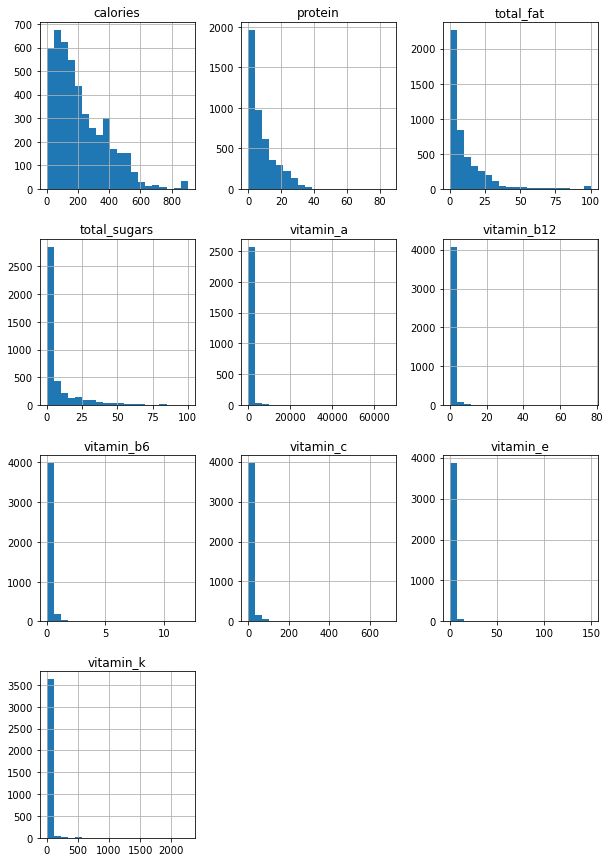

In [42]:
DataFrame.hist(bins=20, figsize=(10,15))
plt.show()

In [39]:
DataFrame.describe()

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
count,4633.000000,4633.000000,4243.000000,2640.000000,4219.000000,4237.000000,4231.000000,3982.000000,3704.000000,4633.000000
mean,8.404446,10.040471,8.709922,469.589015,0.730574,0.197996,8.637060,1.353039,18.579341,213.871358
std,8.822852,14.156297,15.292708,2736.777202,3.393107,0.374223,25.546128,3.880564,83.001037,166.370414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000,1.000000,0.600000,0.000000,0.000000,0.050000,0.000000,0.200000,0.700000,82.000000
50%,5.700000,5.000000,2.500000,16.800000,0.060000,0.110000,1.000000,0.600000,3.900000,169.000000
75%,12.000000,13.900000,8.600000,155.350000,0.450000,0.230000,7.400000,1.300000,13.160000,320.000000
max,85.600000,100.000000,99.800000,66989.000000,76.500000,12.000000,694.000000,149.400000,2262.800000,902.000000


## As we can see there are a lot of null values in our dataset, but before we take care of that we need to split our dataset into training and testing set :

In [38]:
train_set, test_set = train_test_split(DataFrame, test_size=0.2, random_state=42)

### We are going to leave the test set aside, and take a loot at our train set:

# Checking for correlations in our train set:

In [60]:
corr_matrix = train_set.corr()
corr_matrix["calories"].sort_values(ascending=False)

calories        1.000000
total_fat       0.810866
vitamin_e       0.375924
total_sugars    0.369364
protein         0.213920
vitamin_b6      0.108598
vitamin_b12     0.031790
vitamin_a      -0.005059
vitamin_k      -0.023830
vitamin_c      -0.094557
Name: calories, dtype: float64

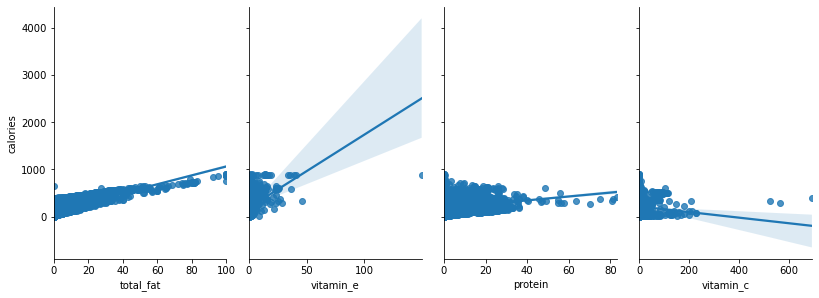

In [72]:
sns.pairplot(train_set,x_vars=['total_fat','vitamin_e','protein','vitamin_c'], y_vars='calories', 
             height=4, aspect = 0.7, kind='reg',dropna=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDD9327D90>,
      dtype=object)

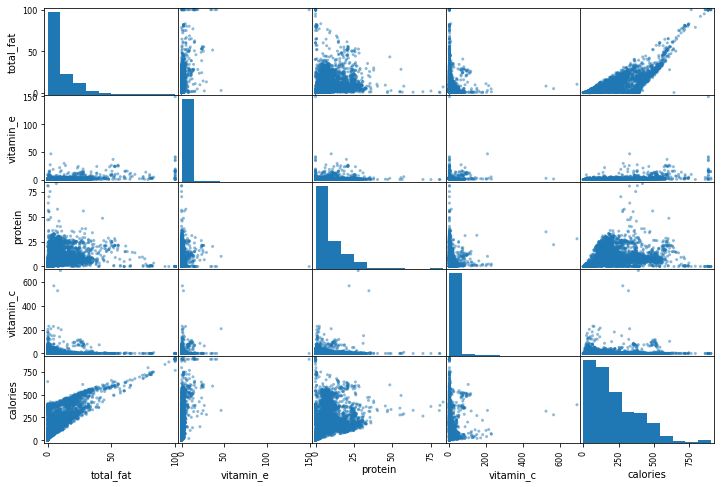

In [68]:
attributes = ['total_fat','vitamin_e','protein','vitamin_c','calories']
scatter_matrix(train_set[attributes], figsize=(12, 8))

## From looking at our correlations, we can see a strong correlation between the total fat and the calories:

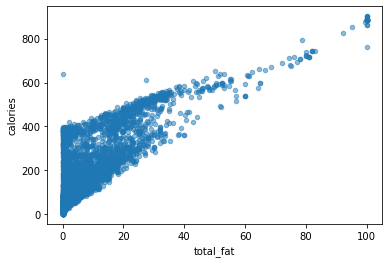

In [73]:
train_set.plot(kind="scatter", x="total_fat", y="calories",
 alpha=0.5)